# Hypothesis Testing

## What is Hypothesis Testing?

- A method used in statistics to determine if there is enough evidence to reject a null hypothesis.
- Helps make decisions based on data analysis.

## Key Terms to Know

- **Null Hypothesis (H₀):** The default assumption that there is no effect or no difference.
- **Alternative Hypothesis (H₁):** The statement we want to test against the null hypothesis.
- **Significance Level (α):** The probability of rejecting the null hypothesis when it is true, commonly set at 0.05.
- **P-value:** The probability of obtaining test results at least as extreme as the observed results, assuming the null hypothesis is true.
- **Test Statistic:** A standardized value used to decide whether to reject the null hypothesis.

## Terms

### T-Statistic (T-Stat)

Imagine you have two boxes of cookies. Each box has cookies of different sizes. You want to know if the cookies in Box A are bigger than the cookies in Box B.

The t-stat is like a ruler that helps you measure and compare the average size of the cookies in the two boxes. If the t-stat is a big number, it means there is a noticeable difference between the cookie sizes in the two boxes. If it's a small number, it means the cookie sizes are pretty similar.

### P-Value

Now, let's say you measured the cookie sizes and found a difference. The p-value helps you figure out if this difference is just a random coincidence or if it's real.

Think of the p-value as a magic coin. If you flip the coin and get heads (a small p-value), it means the difference you found is probably real. If you get tails (a big p-value), it means the difference might just be due to random chance.

In grown-up terms, a small p-value (usually less than 0.05) means you can be confident that the difference is real and not just a fluke. A big p-value means you shouldn't be too sure about the difference.

### Putting It Together

So, when you use the t-stat and p-value together, you're measuring the cookie sizes with your ruler (t-stat) and then using the magic coin (p-value) to decide if the difference you measured is something you should care about.

In short:
- **T-stat** = Ruler to measure differences.
- **P-value** = Magic coin to check if the difference is real or just a random coincidence.

## Steps in Hypothesis Testing

1. **State the Hypotheses**
   - Null hypothesis (H₀)
   - Alternative hypothesis (H₁)
2. **Choose the Significance Level (α)**
   - Commonly used values are 0.05, 0.01.
3. **Collect Data and Compute Test Statistic**
   - Depends on the type of test (e.g., t-test, chi-square test).
4. **Determine the P-value**
   - Compare the p-value with α.
5. **Make a Decision**
   - If p-value ≤ α, reject the null hypothesis.
   - If p-value > α, do not reject the null hypothesis.

## Types of Errors in Hypothesis Testing

- **Type I Error (α):** Rejecting the null hypothesis when it is true (false positive).
- **Type II Error (β):** Failing to reject the null hypothesis when it is false (false negative).

In [39]:
# Importing required libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [40]:
# Example data
np.random.seed(0)
control_group = np.random.uniform(low=5, high=10, size=1000)  # control group with mean = 0
treatment_group = np.random.uniform(low=6, high=11, size=1000)  # treatment group with mean = 0.5

In [41]:
P_RANGE = 0.05
PERMUTATION_VALUE = 500

In [42]:
# Performing t-test
t_stat, p_value = stats.ttest_ind(control_group, treatment_group, equal_var=True, permutations=PERMUTATION_VALUE)

In [43]:
print("Compute Test Statistic")
print(f"\tt-statistic: {t_stat:.2f}")
print(f"\tp-value: {p_value:.4f}")
print("Make a Decision")
if p_value <= P_RANGE:
    print("\tSince p-value ≤ 0.05, reject the null hypothesis.")
    print("\tConclusion: There is evidence that the new group is better.\n")
else:
    print("\tSince p-value > 0.05, do not reject the null hypothesis.")
    print("\tConclusion: There is no evidence that the new group is better.\n")

Compute Test Statistic
	t-statistic: -16.33
	p-value: 0.0000
Make a Decision
	Since p-value ≤ 0.05, reject the null hypothesis.
	Conclusion: There is evidence that the new group is better.



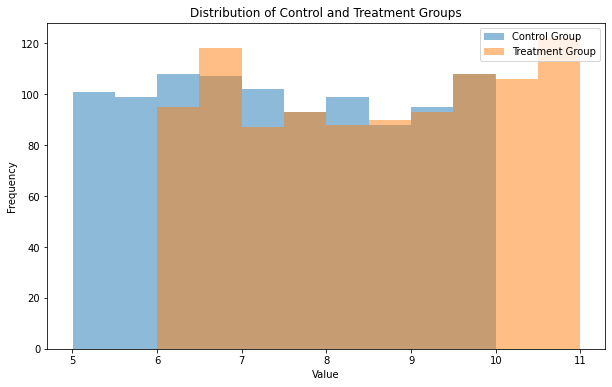

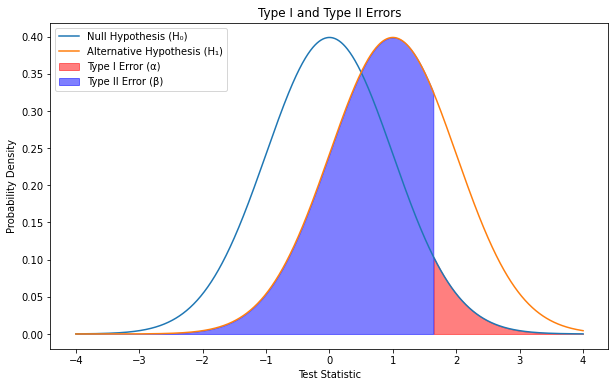

In [44]:
# Visualizing the example
plt.figure(figsize=(10, 6))

# Plotting histograms
plt.hist(control_group, bins=10, alpha=0.5, label='Control Group')
plt.hist(treatment_group, bins=10, alpha=0.5, label='Treatment Group')

# Adding titles and labels
plt.title('Distribution of Control and Treatment Groups')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Showing plot
plt.show()

# Visualizing Type I and Type II Errors
plt.figure(figsize=(10, 6))

# Data for Type I and Type II errors
x = np.linspace(-4, 4, 1000)
null_dist = stats.norm.pdf(x, 0, 1)
alt_dist = stats.norm.pdf(x, 1, 1)

plt.plot(x, null_dist, label='Null Hypothesis (H₀)')
plt.plot(x, alt_dist, label='Alternative Hypothesis (H₁)')

# Shading areas for Type I and Type II errors
plt.fill_between(x, 0, null_dist, where=(x > 1.64), color='red', alpha=0.5, label='Type I Error (α)')
plt.fill_between(x, 0, alt_dist, where=(x < 1.64), color='blue', alpha=0.5, label='Type II Error (β)')

# Adding titles and labels
plt.title('Type I and Type II Errors')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.legend()

# Showing plot
plt.show()

### Imagine a Playground

Imagine you're in a playground, and there are two slides: a **red slide** and a **blue slide**.

- **Red Slide** (Null Hypothesis H₀): This is the usual slide you always play on. Let's say this slide means "nothing special is happening."
- **Blue Slide** (Alternative Hypothesis H₁): This is a new, special slide that you think might be more fun. This slide means "something special is happening."

### Playing on the Slides

Now, you want to decide whether to keep playing on the red slide or switch to the blue slide. You have a way to measure how much fun each slide is (this is like your test statistic).

### Type I Error (False Alarm)

A **Type I Error** is like thinking the blue slide is more fun when it's actually not. You decide to switch to the blue slide, but it turns out it's just as boring as the red slide. You made a mistake by leaving the red slide when there was no real reason to.

### Type II Error (Missed Opportunity)

A **Type II Error** is like thinking the blue slide isn't special when it actually is. You decide to stay on the red slide, but you miss out on the fun you could have had on the blue slide. You made a mistake by not trying the blue slide when it was actually more fun.

### Visualizing the Errors

Imagine the two slides as two hills:

- The **red hill** represents the red slide (H₀).
- The **blue hill** represents the blue slide (H₁).

In the diagram:

- **Red Area (Type I Error):** This is the part of the blue hill that overlaps with the red hill. If you decide to switch to the blue slide (reject H₀) and you land in this area, you've made a Type I Error.
- **Blue Area (Type II Error):** This is the part of the red hill that overlaps with the blue hill. If you decide to stay on the red slide (fail to reject H₀) and you land in this area, you've made a Type II Error.

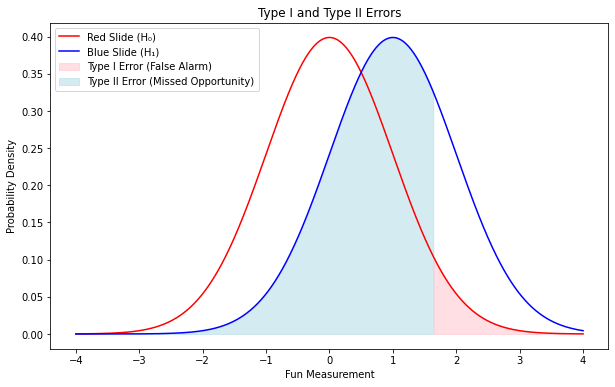

In [45]:
from scipy.stats import norm

# Data for Type I and Type II errors
x = np.linspace(-4, 4, 1000)
null_dist = norm.pdf(x, 0, 1)
alt_dist = norm.pdf(x, 1, 1)

plt.figure(figsize=(10, 6))
plt.plot(x, null_dist, label='Red Slide (H₀)', color='red')
plt.plot(x, alt_dist, label='Blue Slide (H₁)', color='blue')

# Shading areas for Type I and Type II errors
plt.fill_between(x, 0, null_dist, where=(x > 1.64), color='pink', alpha=0.5, label='Type I Error (False Alarm)')
plt.fill_between(x, 0, alt_dist, where=(x < 1.64), color='lightblue', alpha=0.5, label='Type II Error (Missed Opportunity)')

# Adding titles and labels
plt.title('Type I and Type II Errors')
plt.xlabel('Fun Measurement')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### What the Diagram Shows

- **Red Curve (Red Slide - H₀):** The usual fun you get.
- **Blue Curve (Blue Slide - H₁):** The special fun you think might be better.
- **Pink Area:** You think the blue slide is more fun but it's actually not (Type I Error).
- **Light Blue Area:** You think the blue slide isn't more fun but it actually is (Type II Error).

So, the diagram helps you see where you might make mistakes in deciding whether the new slide is really more fun or not.

## Common Statistical Tests

- **t-test:** Compares the means of two groups.
- **Chi-square test:** Tests for association between categorical variables.
- **ANOVA (Analysis of Variance):** Compares means among three or more groups.
- **Regression Analysis:** Examines relationships between variables.

## Conclusion

- Hypothesis testing is a critical tool in statistics for making informed decisions based on data.
- Understanding the steps and being aware of potential errors can improve the reliability of your conclusions.

## Questions?

Feel free to ask any questions or request further explanations!